# Train svm model

In [3]:
import sys
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# local module
import feature_generator

# data path
data_dir = '/labs/sarkerlab/yguo262/simpletransformers/data/natal_sex/data_splits_1'
train_file = f'{data_dir}/train.csv'
test_file = f'{data_dir}/test.csv'

# Read the feature names from the TF-IDF vectorizer
The TF-IDF vectorizer is trained on the training set. It can be seen as a dictionary of which the key is a word/ngram, and the value is a tf-idf score.

In [4]:
# get features
train_X, train_classes, test_X, test_classes = \
        feature_generator.fit_transform(train_file, test_file)

         STUDYID                                               text label  \
0      SC_020493  (kw_male=3, kw_fem=7, 529 days from index date...     F   
1      NC_000440  (kw_male=0, kw_fem=1, -449 days from index dat...     F   
2      NC_010693  (kw_male=1, kw_fem=2, 791 days from index date...     F   
3      NC_003326  (kw_male=2, kw_fem=0, -535 days from index dat...     M   
4      SC_020920  (kw_male=1, kw_fem=7, 48 days from index date)...     F   
...          ...                                                ...   ...   
1225   NC_005645  (kw_male=3, kw_fem=0, 266 days from index date...     M   
1226   NC_005984  (kw_male=1, kw_fem=2, 1423 days from index dat...     F   
1227   SC_053373  (kw_male=1, kw_fem=8, 759 days from index date...     F   
1228  KPNCDCUPT4  (kw_male=0, kw_fem=1, 0 days from index date) ...     M   
1229   NC_010841  (kw_male=1, kw_fem=0, -3546 days from index da...     F   

     source                                          excerpt_1  \
0      kp

In [6]:
# the abs_vectorizer is the TF-IDF vectorizer
vectorizer = feature_generator.abs_vectorizer
features_names = vectorizer.get_feature_names()
print(features_names)

['abd', 'abdomen', 'abdomen soft', 'abdomen soft nontender', 'abdominal', 'abdominal pain', 'able', 'abnormal', 'acne', 'active', 'active ambulatory', 'active ambulatory problems', 'active problem', 'active problem list', 'active yes', 'activity', 'acute', 'additional', 'adenopathy', 'administered', 'administered medications', 'adnexa', 'adult', 'advised', 'affect', 'affirming', 'age', 'age onset', 'ago', 'alcohol', 'aldactone', 'aldactone mg', 'aldactone mg oral', 'aldactone mg oral tab', 'alert', 'allergies', 'alt', 'alt ast', 'alt ast bun', 'alt ast bun cr', 'ambulatory', 'ambulatory problems', 'anesthesia', 'anxiety', 'appearance', 'appearing', 'appears', 'apply', 'appointment', 'appropriate', 'area', 'assessment', 'assessment plan', 'ast', 'ast bun', 'ast bun cr', 'asthma', 'augmentation', 'aware', 'axillary', 'banked', 'banked sperm', 'banking', 'banking sperm', 'basename', 'bd', 'benefit', 'benefits', 'better', 'bid', 'bilateral', 'bilaterally', 'birth', 'birth control', 'bladde

# Train a svm model
If you have a pretrained svm, you can replace this step by loading the svm model.

In [7]:
from sklearn import svm
svm = svm.SVC(C=4, kernel='linear')
svm.fit(train_X, train_classes)

SVC(C=4, kernel='linear')

# Visualize the feature importance

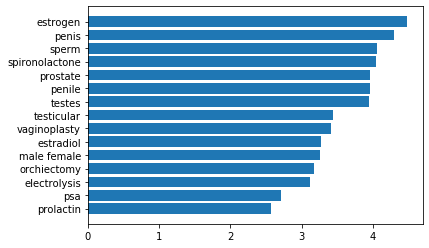

In [10]:
from matplotlib import pyplot as plt

N = 15  # the number of top ngrams to plot
imp = svm.coef_[0] # the feature importance values
names = features_names
imp, names = zip(*sorted(zip(imp, names), reverse=True)[:N])  # format the data

imp = list(imp)
names = list(names)
imp.reverse()
names.reverse()

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)
plt.savefig(f'natal_sex_svm_feature_head_{N}.png')
plt.show()